In [20]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append( os.path.join(".."))

In [21]:
df_full_data =pd.read_csv("../data/pg_catalog.csv")
df_full_data['LoCC']=df_full_data['LoCC'].astype(str).str[0]

/Users/anveshkoganti/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


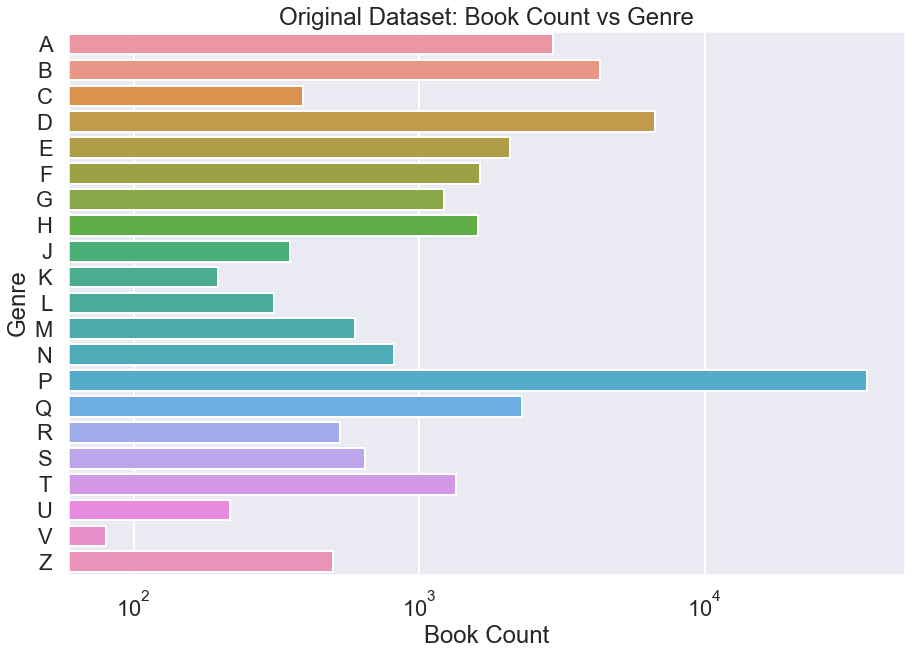

In [22]:
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(15,10))
splot = sns.barplot( x='Text#', y='LoCC', data=df_full_data.groupby('LoCC')['Text#'].nunique().reset_index(), order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V','Z'])
plt.xscale('log')
plt.xlabel('Book Count')
plt.ylabel('Genre')
plt.title('Original Dataset: Book Count vs Genre')
plt.show()

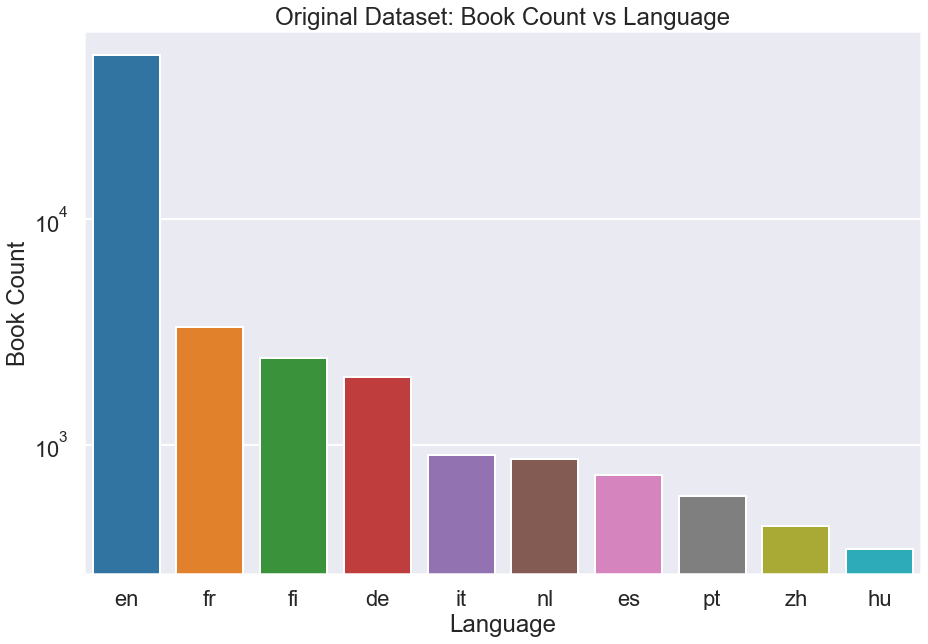

In [23]:

sns.set_context("poster")
sns.set_style("darkgrid")
df_full_data['LangMod']=df_full_data['Language'].str[:2]
plt.figure(figsize=(15,10))
splot = sns.barplot( x='LangMod', y='Text#', data=df_full_data.groupby('LangMod')['Text#'].nunique().sort_values(ascending=False).head(10).reset_index())
plt.yscale('log')
plt.xlabel('Language')
plt.ylabel('Book Count')
plt.title('Original Dataset: Book Count vs Language')
plt.show()

In [24]:
from UtilityFunctions import CommonHelpers

PREPROCESSED_STORE_LOC = os.path.join("..","data","preprocessed")
all_books = CommonHelpers.load_pickle(os.path.join(PREPROCESSED_STORE_LOC,"books_english_preprocessed.pickle"))

book_length=[]
for x in all_books:
    book_length.append(len(x))

df_sample_data =pd.read_csv("../data/samples_80_limit.csv")
df_sample_data['LoCC']=df_sample_data['LoCC'].astype(str).str[0]
df_sample_data['Book_Length'] = book_length

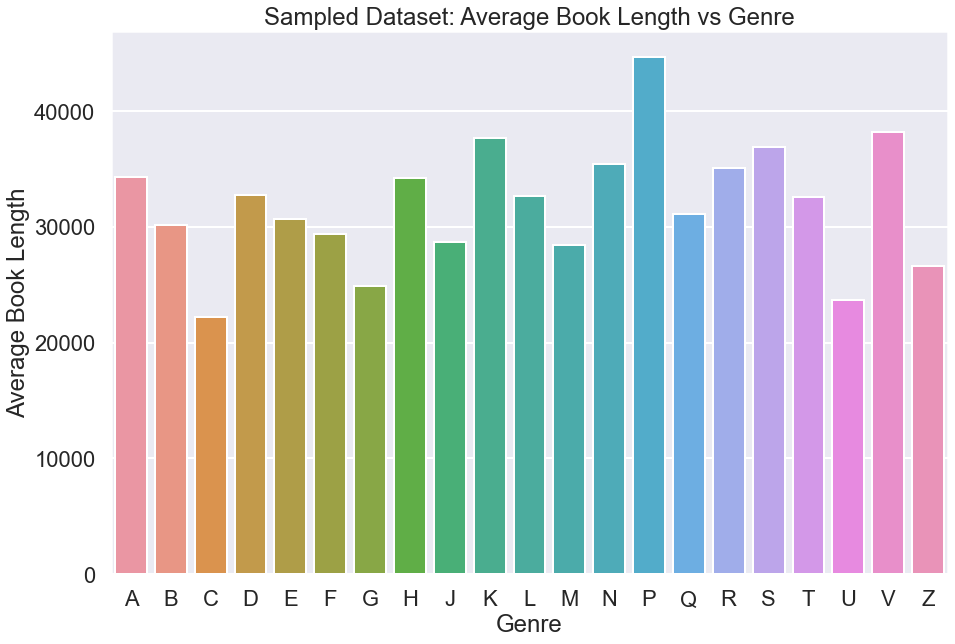

In [25]:
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(15,10))
splot = sns.barplot( y='Book_Length', x='LoCC', data=df_sample_data.groupby('LoCC')['Book_Length'].mean().reset_index(), order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V','Z'])
plt.xlabel('Genre')
plt.ylabel('Average Book Length')
plt.title('Sampled Dataset: Average Book Length vs Genre')
plt.show()